In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('HousingPrices.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Split data

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train,test=train_test_split(data,test_size=0.2,random_state=26) #We choose a 80% training set and 20% test set

In [5]:
train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

/home/fy/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 6601 to 21301
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17290 non-null  object 
 1   price          17290 non-null  float64
 2   bedrooms       17290 non-null  int64  
 3   bathrooms      17290 non-null  float64
 4   sqft_living    17290 non-null  int64  
 5   sqft_lot       17290 non-null  int64  
 6   floors         17290 non-null  float64
 7   waterfront     17290 non-null  int64  
 8   view           17290 non-null  int64  
 9   condition      17290 non-null  int64  
 10  grade          17290 non-null  int64  
 11  sqft_above     17290 non-null  int64  
 12  sqft_basement  17290 non-null  int64  
 13  yr_built       17290 non-null  int64  
 14  yr_renovated   17290 non-null  int64  
 15  zipcode        17290 non-null  int64  
 16  lat            17290 non-null  float64
 17  long           17290 non-null  float64
 18  sqf

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 504 to 13794
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4323 non-null   object 
 1   price          4323 non-null   float64
 2   bedrooms       4323 non-null   int64  
 3   bathrooms      4323 non-null   float64
 4   sqft_living    4323 non-null   int64  
 5   sqft_lot       4323 non-null   int64  
 6   floors         4323 non-null   float64
 7   waterfront     4323 non-null   int64  
 8   view           4323 non-null   int64  
 9   condition      4323 non-null   int64  
 10  grade          4323 non-null   int64  
 11  sqft_above     4323 non-null   int64  
 12  sqft_basement  4323 non-null   int64  
 13  yr_built       4323 non-null   int64  
 14  yr_renovated   4323 non-null   int64  
 15  zipcode        4323 non-null   int64  
 16  lat            4323 non-null   float64
 17  long           4323 non-null   float64
 18  sqft_


## Checking normality of our target variable


In [8]:
import seaborn as sns
from scipy.stats import norm, skew
import matplotlib.pyplot as plt

/home/fy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 540914.65 and sigma = 365941.31



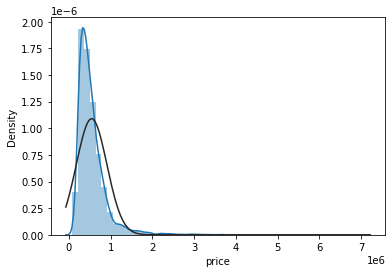

In [9]:
# Checking if our target variable is normally skewed
def checkskew(col):
    sns.distplot(train[col],fit=norm)
    (mu, sigma) = norm.fit(train[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
checkskew('price')

/tmp/ipykernel_41667/2423231271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['price'] = np.log1p(train['price'])
/home/fy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 13.05 and sigma = 0.53



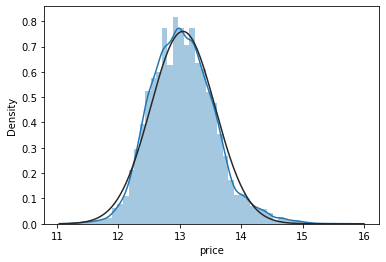

In [10]:
train['price'] = np.log1p(train['price'])
checkskew('price')

## Checking and removing outliers

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 6601 to 21301
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17290 non-null  object 
 1   price          17290 non-null  float64
 2   bedrooms       17290 non-null  int64  
 3   bathrooms      17290 non-null  float64
 4   sqft_living    17290 non-null  int64  
 5   sqft_lot       17290 non-null  int64  
 6   floors         17290 non-null  float64
 7   waterfront     17290 non-null  int64  
 8   view           17290 non-null  int64  
 9   condition      17290 non-null  int64  
 10  grade          17290 non-null  int64  
 11  sqft_above     17290 non-null  int64  
 12  sqft_basement  17290 non-null  int64  
 13  yr_built       17290 non-null  int64  
 14  yr_renovated   17290 non-null  int64  
 15  zipcode        17290 non-null  int64  
 16  lat            17290 non-null  float64
 17  long           17290 non-null  float64
 18  sqf

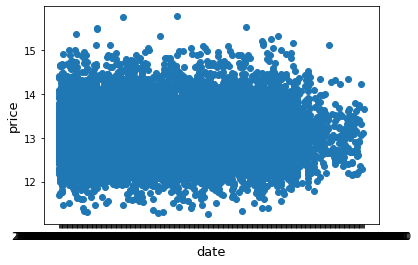

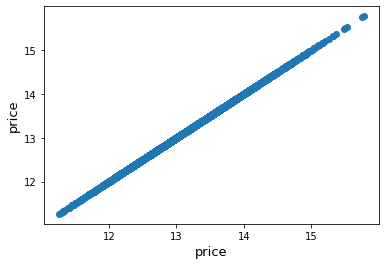

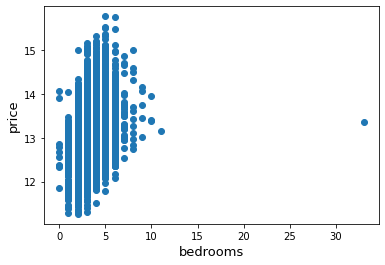

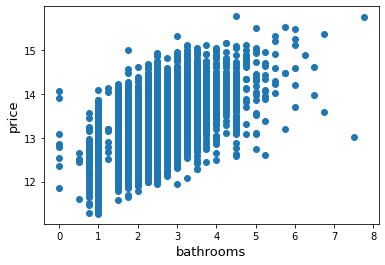

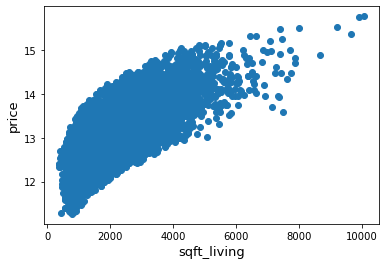

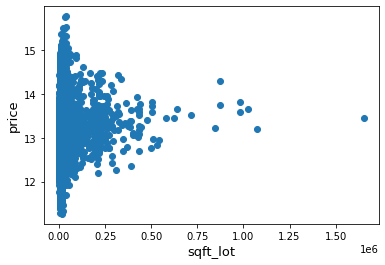

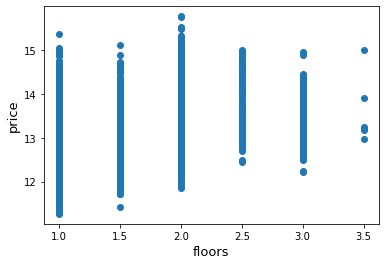

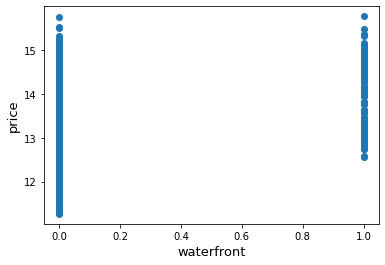

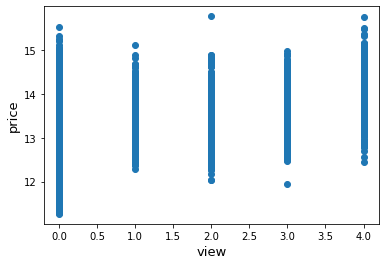

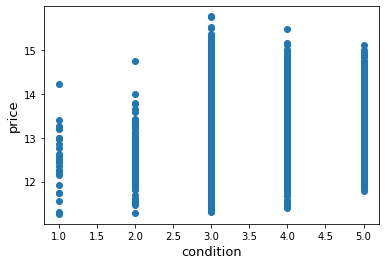

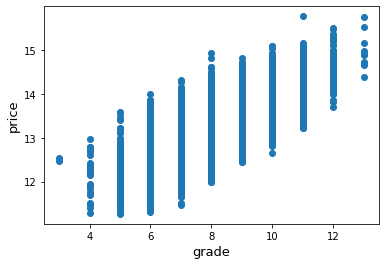

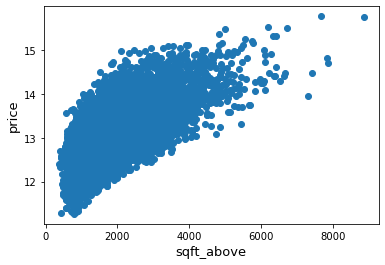

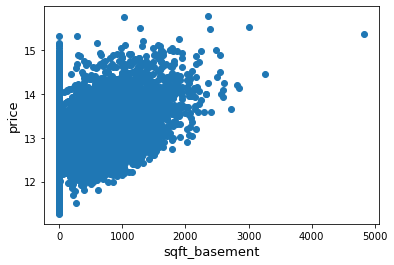

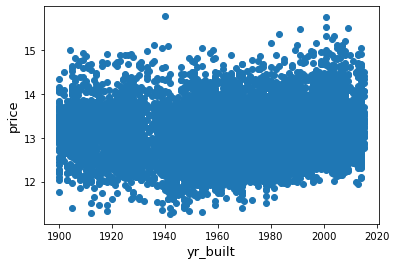

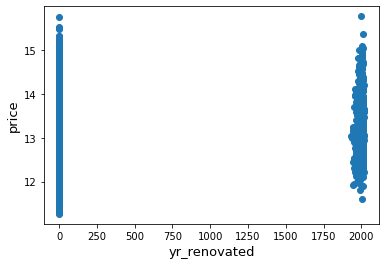

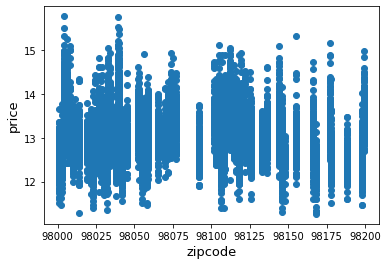

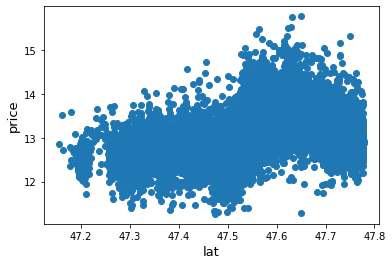

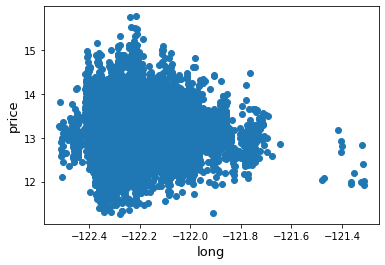

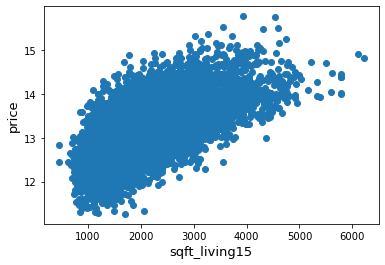

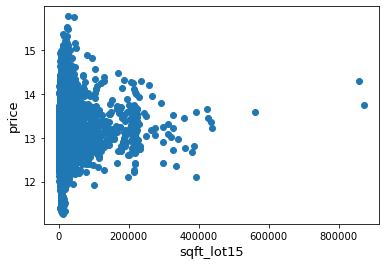

In [12]:
for col in train.columns:
    fig, ax = plt.subplots()
    ax.scatter(x = train[col], y = train['price'])
    plt.ylabel('price', fontsize=13)
    plt.xlabel(col, fontsize=13)
    plt.show()

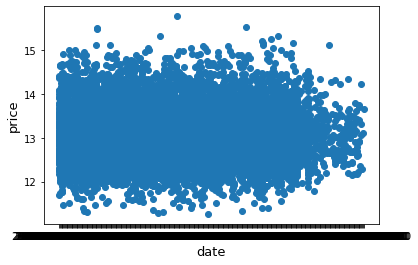

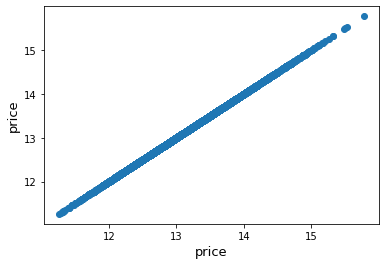

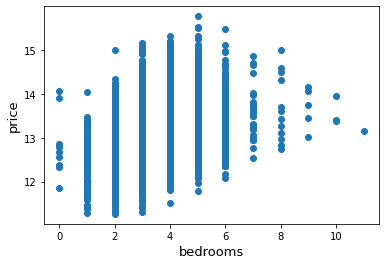

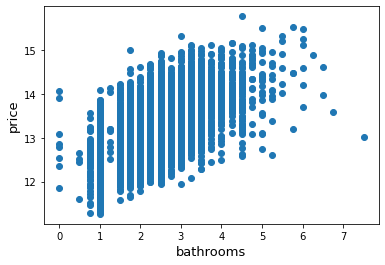

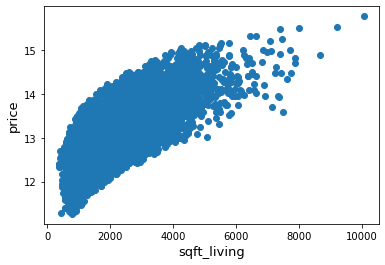

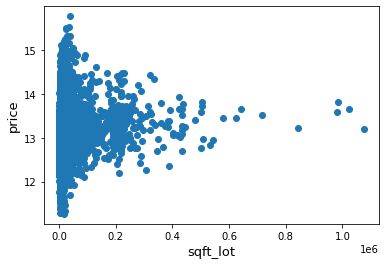

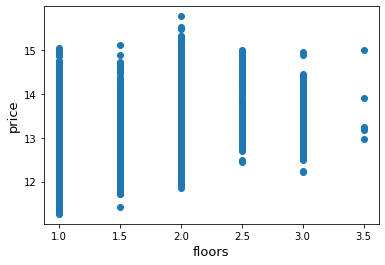

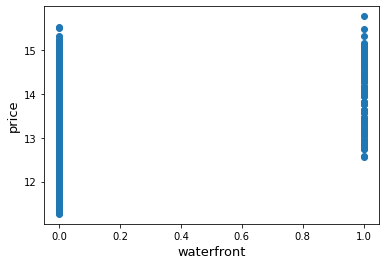

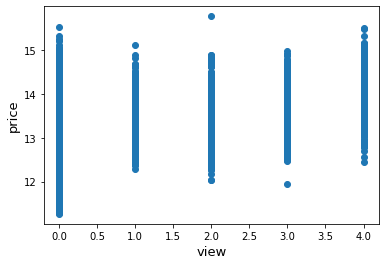

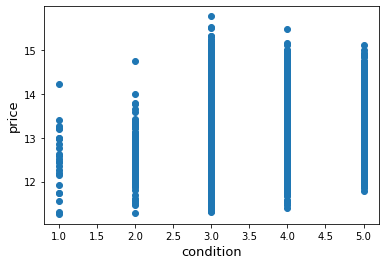

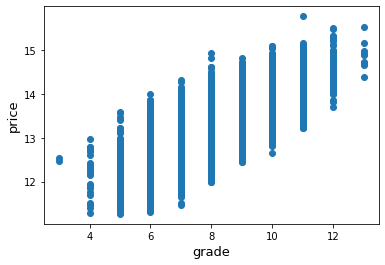

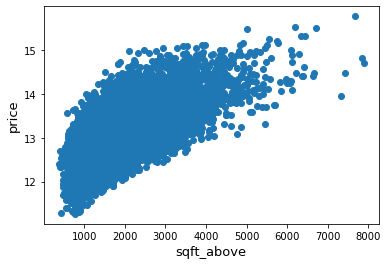

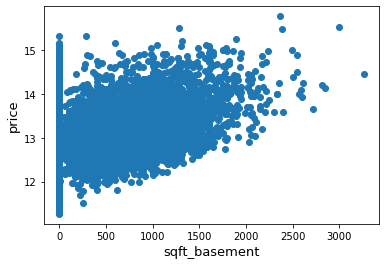

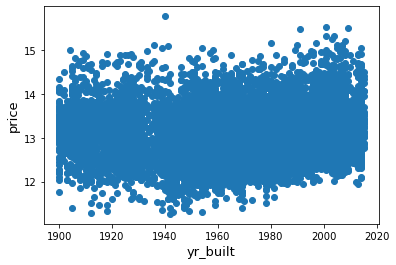

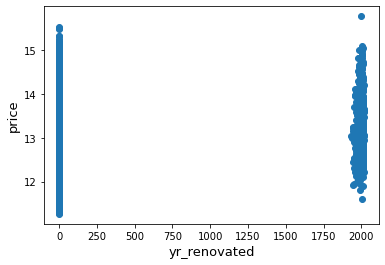

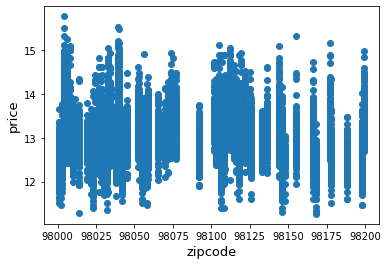

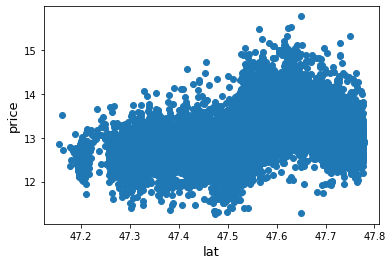

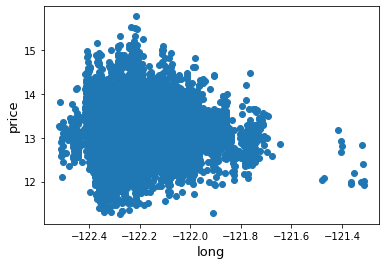

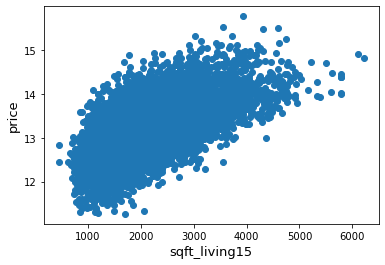

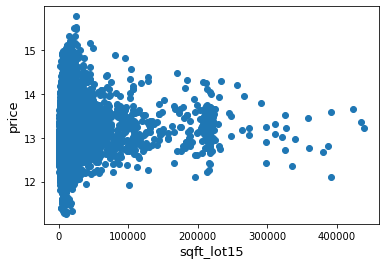

In [13]:
# Dropping variables seen as outliers from the data 
train = train.drop(train[(train['bedrooms']>20)].index)
train = train.drop(train[(train['sqft_lot']>1.25e6)].index)
train = train.drop(train[(train['sqft_above']>8200)].index)
train = train.drop(train[(train['sqft_basement']>4000)].index)
train = train.drop(train[(train['sqft_lot15']>500000)].index)

for col in train.columns:
    fig, ax = plt.subplots()
    ax.scatter(x = train[col], y = train['price'])
    plt.ylabel('price', fontsize=13)
    plt.xlabel(col, fontsize=13)
    plt.show()


## Checking the correlation between variables

<AxesSubplot:>

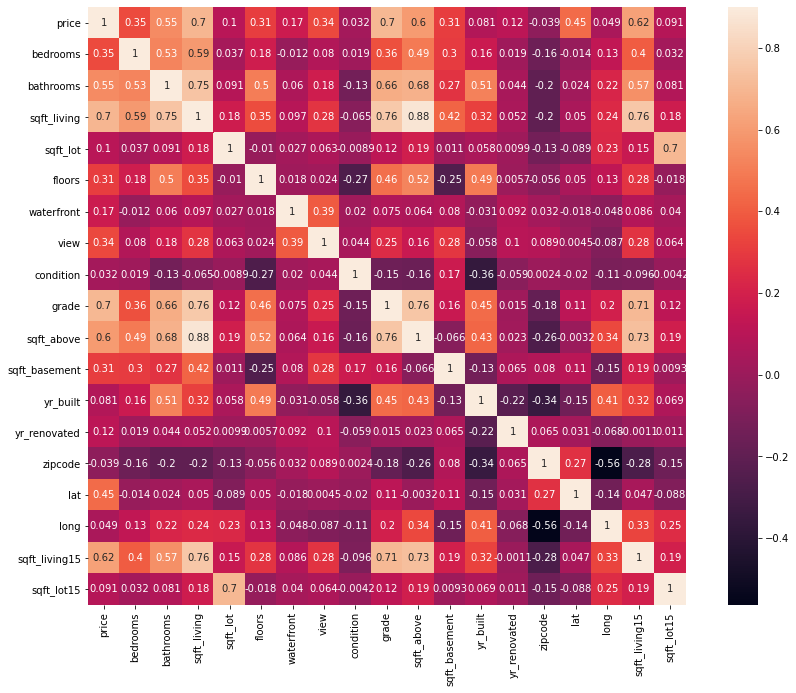

In [14]:
corrmat = train.corr()
plt.subplots(figsize=(15,11))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

In [15]:
#Drop columns 'bedroom', 'bathroom'
train.drop(['zipcode', 'condition', 'date'],axis =1, inplace = True)
test.drop(['zipcode', 'condition', 'date'],axis =1, inplace = True)

/home/fy/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17283 entries, 6601 to 21301
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17283 non-null  float64
 1   bedrooms       17283 non-null  int64  
 2   bathrooms      17283 non-null  float64
 3   sqft_living    17283 non-null  int64  
 4   sqft_lot       17283 non-null  int64  
 5   floors         17283 non-null  float64
 6   waterfront     17283 non-null  int64  
 7   view           17283 non-null  int64  
 8   grade          17283 non-null  int64  
 9   sqft_above     17283 non-null  int64  
 10  sqft_basement  17283 non-null  int64  
 11  yr_built       17283 non-null  int64  
 12  yr_renovated   17283 non-null  int64  
 13  lat            17283 non-null  float64
 14  long           17283 non-null  float64
 15  sqft_living15  17283 non-null  int64  
 16  sqft_lot15     17283 non-null  int64  
dtypes: float64(5), int64(12)
memory usage: 2.4 MB


In [17]:
y_train = train['price']
train.drop('price', axis = 1, inplace = True)
y_train

6601     12.577640
12031    12.937240
17784    12.443123
9819     13.071072
7138     13.122365
           ...    
6304     13.415034
10202    13.180634
10177    14.151984
9648     12.793723
21301    13.326114
Name: price, Length: 17283, dtype: float64

In [18]:
y_test = np.log1p(test['price'])
test.drop('price', axis = 1, inplace = True)
y_test

504      12.542548
3500     13.795309
9863     12.842652
10292    13.296318
13371    13.406039
           ...    
7227     13.161586
16143    12.345404
16081    14.141211
1756     13.652993
13794    12.765691
Name: price, Length: 4323, dtype: float64

# Model selection


In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
def evaluate(model,CV=5):
    model.fit(train,y_train)
    neg_scores=cross_val_score(model,train,y_train,scoring="neg_mean_squared_error",cv=CV)
    scores=np.sqrt(-neg_scores)
    y_pred = model.predict(train)
    R2_score = r2_score(y_train,y_pred)
    print('r2 socre = ',R2_score)
    print("\nTrain error : ",np.sqrt(mean_squared_error(y_train,y_pred)))
    print("\nValidation score : ",scores.mean())
    print("\nStandard deviation : ",scores.std())

## Linear regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
Linear = LinearRegression() 

In [23]:
evaluate(Linear)

r2 socre =  0.7619518256497441

Train error :  0.25585347587039775

Validation score :  0.2560944375860933

Standard deviation :  0.004006950620689646


## Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
Forest = RandomForestRegressor(verbose = 5)

In [26]:
evaluate(Forest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


r2 socre =  0.9824331020248751

Train error :  0.06950346133096219

Validation score :  0.17973818365418012

Standard deviation :  0.006160777559117289


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


## XGBoost

In [27]:
from xgboost import XGBRegressor

In [28]:
XGB = XGBRegressor(verbose = 5)

In [29]:
evaluate(XGB)

[16:29:16] WARNING: ../src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:29:18] WARNING: ../src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:29:20] WARNING: ../src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

## CatBoost

In [30]:
from catboost import CatBoostRegressor

In [31]:
cat = CatBoostRegressor(verbose = 5)

In [32]:
evaluate(cat)

Learning rate set to 0.064228
0:	learn: 0.5018920	total: 75.2ms	remaining: 1m 15s
5:	learn: 0.4090249	total: 93.9ms	remaining: 15.6s
10:	learn: 0.3455988	total: 112ms	remaining: 10.1s
15:	learn: 0.2998809	total: 140ms	remaining: 8.61s
20:	learn: 0.2676946	total: 161ms	remaining: 7.52s
25:	learn: 0.2453674	total: 181ms	remaining: 6.76s
30:	learn: 0.2291915	total: 200ms	remaining: 6.24s
35:	learn: 0.2180055	total: 218ms	remaining: 5.84s
40:	learn: 0.2093902	total: 236ms	remaining: 5.53s
45:	learn: 0.2037205	total: 254ms	remaining: 5.27s
50:	learn: 0.1990087	total: 274ms	remaining: 5.09s
55:	learn: 0.1944797	total: 295ms	remaining: 4.98s
60:	learn: 0.1908564	total: 318ms	remaining: 4.89s
65:	learn: 0.1883995	total: 338ms	remaining: 4.78s
70:	learn: 0.1860359	total: 364ms	remaining: 4.76s
75:	learn: 0.1843189	total: 386ms	remaining: 4.69s
80:	learn: 0.1824831	total: 409ms	remaining: 4.64s
85:	learn: 0.1803738	total: 432ms	remaining: 4.59s
90:	learn: 0.1789509	total: 450ms	remaining: 4.49s


810:	learn: 0.1371074	total: 3.49s	remaining: 814ms
815:	learn: 0.1370111	total: 3.52s	remaining: 793ms
820:	learn: 0.1368251	total: 3.54s	remaining: 771ms
825:	learn: 0.1366804	total: 3.56s	remaining: 750ms
830:	learn: 0.1365489	total: 3.58s	remaining: 729ms
835:	learn: 0.1364155	total: 3.6s	remaining: 707ms
840:	learn: 0.1362956	total: 3.62s	remaining: 685ms
845:	learn: 0.1361632	total: 3.64s	remaining: 663ms
850:	learn: 0.1360542	total: 3.66s	remaining: 641ms
855:	learn: 0.1359300	total: 3.68s	remaining: 619ms
860:	learn: 0.1358220	total: 3.7s	remaining: 598ms
865:	learn: 0.1356791	total: 3.72s	remaining: 576ms
870:	learn: 0.1355365	total: 3.74s	remaining: 555ms
875:	learn: 0.1353913	total: 3.76s	remaining: 533ms
880:	learn: 0.1352630	total: 3.78s	remaining: 511ms
885:	learn: 0.1351256	total: 3.8s	remaining: 489ms
890:	learn: 0.1350118	total: 3.82s	remaining: 467ms
895:	learn: 0.1348769	total: 3.83s	remaining: 445ms
900:	learn: 0.1347161	total: 3.85s	remaining: 423ms
905:	learn: 0.1

605:	learn: 0.1410155	total: 2.95s	remaining: 1.92s
610:	learn: 0.1408280	total: 2.98s	remaining: 1.9s
615:	learn: 0.1406476	total: 3s	remaining: 1.87s
620:	learn: 0.1404982	total: 3.03s	remaining: 1.85s
625:	learn: 0.1403218	total: 3.05s	remaining: 1.82s
630:	learn: 0.1401735	total: 3.08s	remaining: 1.8s
635:	learn: 0.1399791	total: 3.1s	remaining: 1.77s
640:	learn: 0.1398445	total: 3.12s	remaining: 1.75s
645:	learn: 0.1396771	total: 3.16s	remaining: 1.73s
650:	learn: 0.1395489	total: 3.18s	remaining: 1.7s
655:	learn: 0.1393245	total: 3.2s	remaining: 1.68s
660:	learn: 0.1391462	total: 3.22s	remaining: 1.65s
665:	learn: 0.1390084	total: 3.24s	remaining: 1.63s
670:	learn: 0.1387928	total: 3.27s	remaining: 1.6s
675:	learn: 0.1386538	total: 3.28s	remaining: 1.57s
680:	learn: 0.1384881	total: 3.3s	remaining: 1.54s
685:	learn: 0.1383362	total: 3.32s	remaining: 1.52s
690:	learn: 0.1381889	total: 3.33s	remaining: 1.49s
695:	learn: 0.1380422	total: 3.36s	remaining: 1.47s
700:	learn: 0.1378799	

390:	learn: 0.1500726	total: 1.63s	remaining: 2.54s
395:	learn: 0.1498193	total: 1.65s	remaining: 2.52s
400:	learn: 0.1496022	total: 1.68s	remaining: 2.51s
405:	learn: 0.1493239	total: 1.69s	remaining: 2.48s
410:	learn: 0.1491224	total: 1.72s	remaining: 2.46s
415:	learn: 0.1489672	total: 1.73s	remaining: 2.43s
420:	learn: 0.1487465	total: 1.75s	remaining: 2.4s
425:	learn: 0.1484451	total: 1.76s	remaining: 2.38s
430:	learn: 0.1482229	total: 1.78s	remaining: 2.35s
435:	learn: 0.1479664	total: 1.8s	remaining: 2.33s
440:	learn: 0.1477126	total: 1.82s	remaining: 2.31s
445:	learn: 0.1475099	total: 1.85s	remaining: 2.3s
450:	learn: 0.1472604	total: 1.88s	remaining: 2.28s
455:	learn: 0.1470517	total: 1.9s	remaining: 2.26s
460:	learn: 0.1468396	total: 1.92s	remaining: 2.25s
465:	learn: 0.1466482	total: 1.94s	remaining: 2.23s
470:	learn: 0.1464226	total: 1.96s	remaining: 2.2s
475:	learn: 0.1462531	total: 1.98s	remaining: 2.18s
480:	learn: 0.1460222	total: 2s	remaining: 2.16s
485:	learn: 0.145847

200:	learn: 0.1647635	total: 794ms	remaining: 3.15s
205:	learn: 0.1641560	total: 814ms	remaining: 3.14s
210:	learn: 0.1636573	total: 833ms	remaining: 3.12s
215:	learn: 0.1630731	total: 854ms	remaining: 3.1s
220:	learn: 0.1626861	total: 871ms	remaining: 3.07s
225:	learn: 0.1622684	total: 889ms	remaining: 3.04s
230:	learn: 0.1618822	total: 905ms	remaining: 3.01s
235:	learn: 0.1614990	total: 931ms	remaining: 3.01s
240:	learn: 0.1611685	total: 955ms	remaining: 3.01s
245:	learn: 0.1609217	total: 976ms	remaining: 2.99s
250:	learn: 0.1606178	total: 1.01s	remaining: 3.01s
255:	learn: 0.1602489	total: 1.03s	remaining: 2.98s
260:	learn: 0.1598045	total: 1.05s	remaining: 2.97s
265:	learn: 0.1595301	total: 1.07s	remaining: 2.94s
270:	learn: 0.1591894	total: 1.08s	remaining: 2.92s
275:	learn: 0.1588046	total: 1.1s	remaining: 2.89s
280:	learn: 0.1584959	total: 1.12s	remaining: 2.86s
285:	learn: 0.1581785	total: 1.14s	remaining: 2.83s
290:	learn: 0.1578749	total: 1.15s	remaining: 2.81s
295:	learn: 0.

Learning rate set to 0.062003
0:	learn: 0.5008184	total: 3.71ms	remaining: 3.71s
5:	learn: 0.4108401	total: 23.2ms	remaining: 3.85s
10:	learn: 0.3492429	total: 41.5ms	remaining: 3.73s
15:	learn: 0.3048551	total: 60.7ms	remaining: 3.73s
20:	learn: 0.2719673	total: 78.4ms	remaining: 3.66s
25:	learn: 0.2497654	total: 97.5ms	remaining: 3.65s
30:	learn: 0.2320332	total: 116ms	remaining: 3.62s
35:	learn: 0.2193387	total: 135ms	remaining: 3.6s
40:	learn: 0.2116044	total: 154ms	remaining: 3.59s
45:	learn: 0.2044857	total: 172ms	remaining: 3.57s
50:	learn: 0.1992092	total: 190ms	remaining: 3.53s
55:	learn: 0.1956248	total: 211ms	remaining: 3.55s
60:	learn: 0.1919441	total: 232ms	remaining: 3.57s
65:	learn: 0.1894547	total: 249ms	remaining: 3.52s
70:	learn: 0.1871453	total: 266ms	remaining: 3.48s
75:	learn: 0.1845441	total: 282ms	remaining: 3.43s
80:	learn: 0.1829102	total: 299ms	remaining: 3.39s
85:	learn: 0.1811175	total: 316ms	remaining: 3.36s
90:	learn: 0.1798825	total: 332ms	remaining: 3.32

825:	learn: 0.1338156	total: 3.42s	remaining: 721ms
830:	learn: 0.1336329	total: 3.45s	remaining: 701ms
835:	learn: 0.1334341	total: 3.46s	remaining: 679ms
840:	learn: 0.1333063	total: 3.48s	remaining: 658ms
845:	learn: 0.1331783	total: 3.5s	remaining: 637ms
850:	learn: 0.1330467	total: 3.52s	remaining: 616ms
855:	learn: 0.1329003	total: 3.53s	remaining: 594ms
860:	learn: 0.1327709	total: 3.55s	remaining: 573ms
865:	learn: 0.1326299	total: 3.57s	remaining: 552ms
870:	learn: 0.1324871	total: 3.58s	remaining: 531ms
875:	learn: 0.1323918	total: 3.6s	remaining: 510ms
880:	learn: 0.1322635	total: 3.63s	remaining: 490ms
885:	learn: 0.1321229	total: 3.65s	remaining: 470ms
890:	learn: 0.1320000	total: 3.68s	remaining: 451ms
895:	learn: 0.1318229	total: 3.7s	remaining: 430ms
900:	learn: 0.1316930	total: 3.72s	remaining: 409ms
905:	learn: 0.1315582	total: 3.75s	remaining: 389ms
910:	learn: 0.1314101	total: 3.76s	remaining: 368ms
915:	learn: 0.1312840	total: 3.78s	remaining: 347ms
920:	learn: 0.1

645:	learn: 0.1406273	total: 2.67s	remaining: 1.46s
650:	learn: 0.1404714	total: 2.69s	remaining: 1.44s
655:	learn: 0.1402923	total: 2.72s	remaining: 1.43s
660:	learn: 0.1401021	total: 2.74s	remaining: 1.4s
665:	learn: 0.1399384	total: 2.75s	remaining: 1.38s
670:	learn: 0.1398504	total: 2.77s	remaining: 1.36s
675:	learn: 0.1396722	total: 2.79s	remaining: 1.34s
680:	learn: 0.1395332	total: 2.81s	remaining: 1.31s
685:	learn: 0.1393498	total: 2.82s	remaining: 1.29s
690:	learn: 0.1392056	total: 2.84s	remaining: 1.27s
695:	learn: 0.1390063	total: 2.87s	remaining: 1.25s
700:	learn: 0.1388085	total: 2.9s	remaining: 1.24s
705:	learn: 0.1386910	total: 2.93s	remaining: 1.22s
710:	learn: 0.1385483	total: 2.95s	remaining: 1.2s
715:	learn: 0.1384227	total: 2.96s	remaining: 1.18s
720:	learn: 0.1382571	total: 2.99s	remaining: 1.16s
725:	learn: 0.1381041	total: 3s	remaining: 1.13s
730:	learn: 0.1379626	total: 3.02s	remaining: 1.11s
735:	learn: 0.1378291	total: 3.04s	remaining: 1.09s
740:	learn: 0.1377

## Model optimization

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]}

grid = GridSearchCV(cat, param_grid, cv=5,
                    scoring='neg_mean_squared_error',
                    return_train_score=True, 
                    verbose=5)

#grid.fit(train, y_train)

In [35]:
#final_model = grid.best_estimator_
#final_model

In [36]:
#evaluate(final_model)

Conclusion: nothing to change with the default hyperparameters

## TEST

In [37]:
ypred = cat.predict(test)

In [38]:
score = r2_score(y_test,ypred)
print('r2 socre = ',score)
print('root_mean_squared error =',np.sqrt(mean_squared_error(y_test,ypred)))

r2 socre =  0.899257595998205
root_mean_squared error = 0.16908165824778537


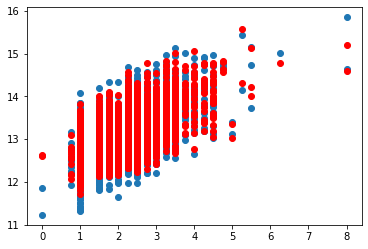

In [39]:
plt.scatter(test['bathrooms'] ,y_test)
plt.scatter(test['bathrooms'],ypred, c = "red")

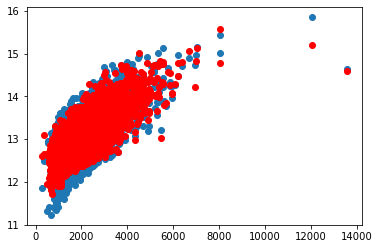

In [40]:
plt.scatter(test['sqft_living'] ,y_test)
plt.scatter(test['sqft_living'],ypred, c = "red")

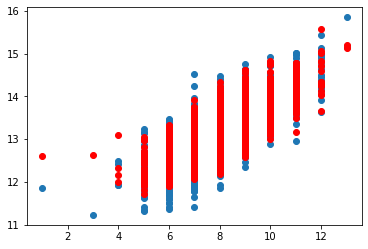

In [41]:
plt.scatter(test['grade'] ,y_test)
plt.scatter(test['grade'],ypred, c = "red")

In [42]:
np.exp(ypred)

array([ 285839.5722247 , 1008729.63514624,  370558.75067519, ...,
       1262551.84609886,  854083.29207684,  361615.41738009])

In [43]:
## Expo result

score = r2_score(np.exp(y_test),np.exp(ypred))
print('r2 socre = ',score)
print('root_mean_squared error =',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(ypred))))

r2 socre =  0.8921454084909843
root_mean_squared error = 122094.5035273159


In [44]:
from sklearn.pipeline import make_pipeline

In [45]:
pipe = make_pipeline(cat)
pipe

Pipeline(steps=[('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x7f32f8464460>)])

In [46]:
evaluate(pipe)

Learning rate set to 0.064228
0:	learn: 0.5018920	total: 7.82ms	remaining: 7.81s
5:	learn: 0.4090249	total: 27.2ms	remaining: 4.5s
10:	learn: 0.3455988	total: 46.1ms	remaining: 4.15s
15:	learn: 0.2998809	total: 67.4ms	remaining: 4.15s
20:	learn: 0.2676946	total: 86.2ms	remaining: 4.02s
25:	learn: 0.2453674	total: 105ms	remaining: 3.93s
30:	learn: 0.2291915	total: 128ms	remaining: 4.01s
35:	learn: 0.2180055	total: 148ms	remaining: 3.97s
40:	learn: 0.2093902	total: 167ms	remaining: 3.91s
45:	learn: 0.2037205	total: 186ms	remaining: 3.86s
50:	learn: 0.1990087	total: 216ms	remaining: 4.01s
55:	learn: 0.1944797	total: 237ms	remaining: 3.99s
60:	learn: 0.1908564	total: 256ms	remaining: 3.93s
65:	learn: 0.1883995	total: 276ms	remaining: 3.91s
70:	learn: 0.1860359	total: 296ms	remaining: 3.87s
75:	learn: 0.1843189	total: 319ms	remaining: 3.88s
80:	learn: 0.1824831	total: 341ms	remaining: 3.87s
85:	learn: 0.1803738	total: 360ms	remaining: 3.83s
90:	learn: 0.1789509	total: 380ms	remaining: 3.8s


795:	learn: 0.1375277	total: 3.6s	remaining: 923ms
800:	learn: 0.1373864	total: 3.63s	remaining: 901ms
805:	learn: 0.1372316	total: 3.65s	remaining: 877ms
810:	learn: 0.1371074	total: 3.66s	remaining: 854ms
815:	learn: 0.1370111	total: 3.68s	remaining: 831ms
820:	learn: 0.1368251	total: 3.7s	remaining: 807ms
825:	learn: 0.1366804	total: 3.72s	remaining: 784ms
830:	learn: 0.1365489	total: 3.74s	remaining: 760ms
835:	learn: 0.1364155	total: 3.76s	remaining: 737ms
840:	learn: 0.1362956	total: 3.78s	remaining: 715ms
845:	learn: 0.1361632	total: 3.82s	remaining: 695ms
850:	learn: 0.1360542	total: 3.84s	remaining: 673ms
855:	learn: 0.1359300	total: 3.87s	remaining: 651ms
860:	learn: 0.1358220	total: 3.9s	remaining: 631ms
865:	learn: 0.1356791	total: 3.93s	remaining: 608ms
870:	learn: 0.1355365	total: 3.95s	remaining: 585ms
875:	learn: 0.1353913	total: 3.96s	remaining: 561ms
880:	learn: 0.1352630	total: 3.98s	remaining: 538ms
885:	learn: 0.1351256	total: 4s	remaining: 515ms
890:	learn: 0.1350

610:	learn: 0.1408280	total: 2.64s	remaining: 1.68s
615:	learn: 0.1406476	total: 2.67s	remaining: 1.67s
620:	learn: 0.1404982	total: 2.7s	remaining: 1.65s
625:	learn: 0.1403218	total: 2.73s	remaining: 1.63s
630:	learn: 0.1401735	total: 2.77s	remaining: 1.62s
635:	learn: 0.1399791	total: 2.8s	remaining: 1.6s
640:	learn: 0.1398445	total: 2.84s	remaining: 1.59s
645:	learn: 0.1396771	total: 2.88s	remaining: 1.58s
650:	learn: 0.1395489	total: 2.92s	remaining: 1.56s
655:	learn: 0.1393245	total: 2.94s	remaining: 1.54s
660:	learn: 0.1391462	total: 2.98s	remaining: 1.53s
665:	learn: 0.1390084	total: 3s	remaining: 1.51s
670:	learn: 0.1387928	total: 3.04s	remaining: 1.49s
675:	learn: 0.1386538	total: 3.09s	remaining: 1.48s
680:	learn: 0.1384881	total: 3.12s	remaining: 1.46s
685:	learn: 0.1383362	total: 3.15s	remaining: 1.44s
690:	learn: 0.1381889	total: 3.18s	remaining: 1.42s
695:	learn: 0.1380422	total: 3.21s	remaining: 1.4s
700:	learn: 0.1378799	total: 3.25s	remaining: 1.39s
705:	learn: 0.13772

405:	learn: 0.1493239	total: 1.63s	remaining: 2.38s
410:	learn: 0.1491224	total: 1.66s	remaining: 2.37s
415:	learn: 0.1489672	total: 1.68s	remaining: 2.36s
420:	learn: 0.1487465	total: 1.7s	remaining: 2.34s
425:	learn: 0.1484451	total: 1.72s	remaining: 2.31s
430:	learn: 0.1482229	total: 1.74s	remaining: 2.29s
435:	learn: 0.1479664	total: 1.76s	remaining: 2.27s
440:	learn: 0.1477126	total: 1.77s	remaining: 2.25s
445:	learn: 0.1475099	total: 1.79s	remaining: 2.23s
450:	learn: 0.1472604	total: 1.81s	remaining: 2.2s
455:	learn: 0.1470517	total: 1.83s	remaining: 2.18s
460:	learn: 0.1468396	total: 1.85s	remaining: 2.16s
465:	learn: 0.1466482	total: 1.86s	remaining: 2.14s
470:	learn: 0.1464226	total: 1.89s	remaining: 2.12s
475:	learn: 0.1462531	total: 1.91s	remaining: 2.1s
480:	learn: 0.1460222	total: 1.94s	remaining: 2.09s
485:	learn: 0.1458478	total: 1.96s	remaining: 2.08s
490:	learn: 0.1455513	total: 1.99s	remaining: 2.06s
495:	learn: 0.1453426	total: 2.01s	remaining: 2.04s
500:	learn: 0.1

205:	learn: 0.1641560	total: 820ms	remaining: 3.16s
210:	learn: 0.1636573	total: 839ms	remaining: 3.14s
215:	learn: 0.1630731	total: 859ms	remaining: 3.12s
220:	learn: 0.1626861	total: 877ms	remaining: 3.09s
225:	learn: 0.1622684	total: 893ms	remaining: 3.06s
230:	learn: 0.1618822	total: 909ms	remaining: 3.03s
235:	learn: 0.1614990	total: 929ms	remaining: 3.01s
240:	learn: 0.1611685	total: 951ms	remaining: 3s
245:	learn: 0.1609217	total: 972ms	remaining: 2.98s
250:	learn: 0.1606178	total: 994ms	remaining: 2.96s
255:	learn: 0.1602489	total: 1.02s	remaining: 2.96s
260:	learn: 0.1598045	total: 1.04s	remaining: 2.95s
265:	learn: 0.1595301	total: 1.06s	remaining: 2.92s
270:	learn: 0.1591894	total: 1.08s	remaining: 2.9s
275:	learn: 0.1588046	total: 1.09s	remaining: 2.87s
280:	learn: 0.1584959	total: 1.11s	remaining: 2.84s
285:	learn: 0.1581785	total: 1.13s	remaining: 2.81s
290:	learn: 0.1578749	total: 1.14s	remaining: 2.78s
295:	learn: 0.1575347	total: 1.16s	remaining: 2.76s
300:	learn: 0.15

Learning rate set to 0.062003
0:	learn: 0.5008184	total: 3.95ms	remaining: 3.95s
5:	learn: 0.4108401	total: 23.4ms	remaining: 3.88s
10:	learn: 0.3492429	total: 42.9ms	remaining: 3.85s
15:	learn: 0.3048551	total: 62.1ms	remaining: 3.82s
20:	learn: 0.2719673	total: 79.9ms	remaining: 3.73s
25:	learn: 0.2497654	total: 97.1ms	remaining: 3.64s
30:	learn: 0.2320332	total: 114ms	remaining: 3.57s
35:	learn: 0.2193387	total: 131ms	remaining: 3.5s
40:	learn: 0.2116044	total: 148ms	remaining: 3.45s
45:	learn: 0.2044857	total: 166ms	remaining: 3.44s
50:	learn: 0.1992092	total: 183ms	remaining: 3.4s
55:	learn: 0.1956248	total: 207ms	remaining: 3.49s
60:	learn: 0.1919441	total: 229ms	remaining: 3.52s
65:	learn: 0.1894547	total: 259ms	remaining: 3.67s
70:	learn: 0.1871453	total: 296ms	remaining: 3.87s
75:	learn: 0.1845441	total: 317ms	remaining: 3.85s
80:	learn: 0.1829102	total: 337ms	remaining: 3.83s
85:	learn: 0.1811175	total: 361ms	remaining: 3.83s
90:	learn: 0.1798825	total: 382ms	remaining: 3.82s

795:	learn: 0.1347530	total: 3.08s	remaining: 789ms
800:	learn: 0.1345645	total: 3.1s	remaining: 770ms
805:	learn: 0.1344366	total: 3.12s	remaining: 750ms
810:	learn: 0.1343041	total: 3.13s	remaining: 730ms
815:	learn: 0.1341531	total: 3.15s	remaining: 710ms
820:	learn: 0.1339678	total: 3.17s	remaining: 690ms
825:	learn: 0.1338156	total: 3.19s	remaining: 671ms
830:	learn: 0.1336329	total: 3.21s	remaining: 653ms
835:	learn: 0.1334341	total: 3.23s	remaining: 634ms
840:	learn: 0.1333063	total: 3.25s	remaining: 614ms
845:	learn: 0.1331783	total: 3.26s	remaining: 594ms
850:	learn: 0.1330467	total: 3.28s	remaining: 575ms
855:	learn: 0.1329003	total: 3.3s	remaining: 556ms
860:	learn: 0.1327709	total: 3.32s	remaining: 536ms
865:	learn: 0.1326299	total: 3.34s	remaining: 516ms
870:	learn: 0.1324871	total: 3.35s	remaining: 497ms
875:	learn: 0.1323918	total: 3.37s	remaining: 477ms
880:	learn: 0.1322635	total: 3.39s	remaining: 457ms
885:	learn: 0.1321229	total: 3.4s	remaining: 438ms
890:	learn: 0.1

605:	learn: 0.1420819	total: 2.23s	remaining: 1.45s
610:	learn: 0.1418967	total: 2.25s	remaining: 1.43s
615:	learn: 0.1417492	total: 2.27s	remaining: 1.41s
620:	learn: 0.1415293	total: 2.28s	remaining: 1.39s
625:	learn: 0.1414002	total: 2.3s	remaining: 1.37s
630:	learn: 0.1411982	total: 2.32s	remaining: 1.35s
635:	learn: 0.1410077	total: 2.34s	remaining: 1.34s
640:	learn: 0.1408162	total: 2.35s	remaining: 1.32s
645:	learn: 0.1406273	total: 2.37s	remaining: 1.3s
650:	learn: 0.1404714	total: 2.39s	remaining: 1.28s
655:	learn: 0.1402923	total: 2.41s	remaining: 1.26s
660:	learn: 0.1401021	total: 2.42s	remaining: 1.24s
665:	learn: 0.1399384	total: 2.45s	remaining: 1.23s
670:	learn: 0.1398504	total: 2.47s	remaining: 1.21s
675:	learn: 0.1396722	total: 2.48s	remaining: 1.19s
680:	learn: 0.1395332	total: 2.5s	remaining: 1.17s
685:	learn: 0.1393498	total: 2.52s	remaining: 1.15s
690:	learn: 0.1392056	total: 2.53s	remaining: 1.13s
695:	learn: 0.1390063	total: 2.55s	remaining: 1.11s
700:	learn: 0.1

In [47]:
ypred = pipe.predict(test)

In [48]:
score = r2_score(y_test,ypred)
print('r2 socre = ',score)
print('root_mean_squared error =',np.sqrt(mean_squared_error(y_test,ypred)))

r2 socre =  0.899257595998205
root_mean_squared error = 0.16908165824778537


# Deploy

In [49]:
# import pickle
import pickle

# dump the pipeline model
pickle.dump(pipe, open('model.pkl', 'wb'))